# Approch 1

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


TOTAL IMAGE DETECTED-- 10


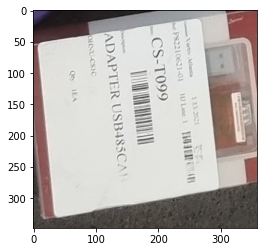

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


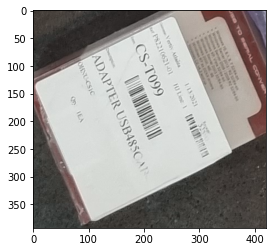

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


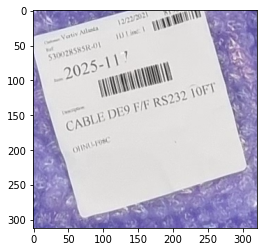

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


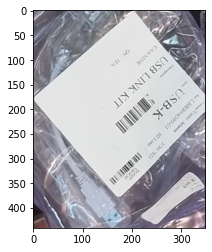

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


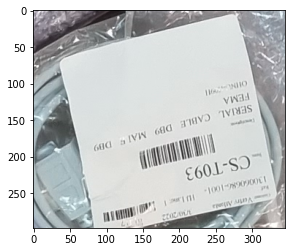

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


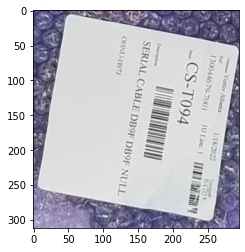

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


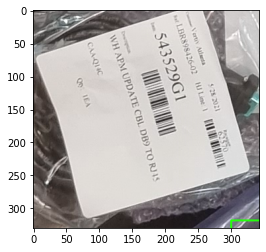

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


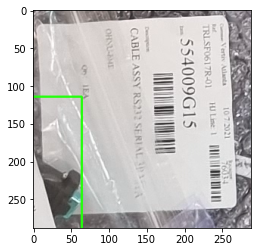

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


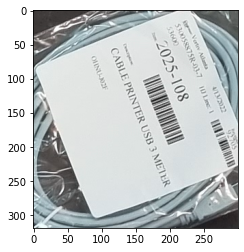

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


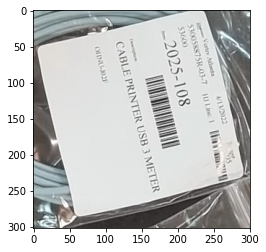

ITEM DETECTED AFTER OCR--- ['CS-T099', 'CS-T099', '2025-108', '2025-108', '554009G15']

ITEM IN PICK SHEET --- ['USB-k', '543529G1', '515417G1', 'CS-T099', 'CS-T099', '2025-117', 'CS-T094', 'CS-T093', '2025-108', '2025-108', '554009G15']

all parts are  NOT as per the sheet, Please validate again

ITEM MISSING --- ['CS-T093', '515417G1', '543529G1', '2025-117', 'CS-T094', 'USB-k']


In [1]:
import numpy as np
import os, json, cv2, random
import easyocr
import cv2
from matplotlib import pyplot as plt


image = cv2.imread('./data/20220502_130423.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

# Threshold and morph close
thresh = cv2.threshold(sharpen, 160, 255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
kernel1 = np.ones((8,8))
imgDial = cv2.dilate(close,kernel1,iterations=3)
imgThre = cv2.erode(imgDial,kernel1,iterations=2)
imgThre=cv2.bitwise_not(imgThre)
imgDial1 = cv2.dilate(imgThre,kernel1,iterations=5)


# Find contours and filter using threshold area
cnts = cv2.findContours(imgDial1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 50000
max_area = 110000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        if h/w < 1.5 and w/h < 1.5:
            ROI = image[y:y+h, x:x+w]
            #cv2.imshow(ROI)
            cv2.imwrite('./data/output_file/output_img_{}.png'.format(image_number), ROI)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
            image_number += 1
        else:
            pass
print('TOTAL IMAGE DETECTED--',image_number)


la=[]
for i in range(image_number):
    #print(i)
    IMAGE_PATH = './data/output_file/output_img_{}.png'.format(i)
    image = cv2.imread(IMAGE_PATH)


    image = cv2.imread(IMAGE_PATH)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    coords = np.column_stack(np.where(thresh > 45))
    angle = cv2.minAreaRect(coords)[-1]
    #print(angle)
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
    flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    reader = easyocr.Reader(['en'])
    result = reader.readtext(rotated)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    plt.imshow(image)
    plt.show()

    spacer = 100
    l1=[]
    for detection in result: 
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]    
        l1.append(text)    
        rotated = cv2.rectangle(rotated,(int(top_left[0]),int(top_left[1])),(int(bottom_right[0]),int(bottom_right[1])),(0,255,0),3)
        rotated = cv2.putText(rotated,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
        #spacer+=50
    
    
    #plt.imshow(rotated)
    #plt.show()
    
    la.append(l1)
    
    #l1[(l1.index('Item:')+1)]




#From pick sheet
l2=['USB-k','543529G1','515417G1','CS-T099','CS-T099','2025-117','CS-T094','CS-T093','2025-108','2025-108','554009G15']

l3 = []
for i in la:
    for l in i:
        l3.append(l)

result = []
for element in l2:
    if element in l3:
        result.append(element)

print("ITEM DETECTED AFTER OCR---",result)
print()
print("ITEM IN PICK SHEET ---",l2)
print()


if image_number == len(result):
    print('all parts are as per the sheet, ')
else:
    print('all parts are  NOT as per the sheet, Please validate again')
    
print()
print("ITEM MISSING ---",list(set(l2)-set(result)))




#  barcode   Approch 2

In [2]:
#!pip install pyzbar

from matplotlib import pyplot as plt
import cv2
from pyzbar.pyzbar import decode
  
# Make one method to decode the barcode
def BarcodeReader(image):
     
    # read the image in numpy array using cv2
    img = cv2.imread(image)
      
    # Decode the barcode image
    detectedBarcodes = decode(img)
      
    # If not detected then print the message
    if not detectedBarcodes:
        print("Barcode Not Detected or your barcode is blank/corrupted!")
    else:
       
          # Traverse through all the detected barcodes in image
        for barcode in detectedBarcodes:
           
            # Locate the barcode position in image
            (x, y, w, h) = barcode.rect
             
            # Put the rectangle in image using
            # cv2 to heighlight the barcode
            cv2.rectangle(img, (x-10, y-10),
                          (x + w+10, y + h+10),
                          (255, 0, 0), 2)
             
            if barcode.data!="":
               
            # Print the barcode data
                print('data',barcode.data)
                #print('type',barcode.type)
                
                return(barcode.data)
     
    
    
    
    plt.imshow(img)
    plt.show()
    #Display the image
    #cv2.imshow("Image", img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
 




image="./data/20220502_130050.jpg"

a=BarcodeReader(image)
import codecs

strData = codecs.decode(a, 'UTF-8')
print(strData)


data b'USB-K'
USB-K


In [ ]:
## validate